<a href="https://colab.research.google.com/github/450fausto/Productivity/blob/main/Proyecto_Fase3_mod2_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BEDU: Data Science 3 (Santander Universidades)**
# *Machine Learning*

## Predicción de Productividad en Empleados de la Industria Textil

__Equipo 1__

El equipo de colaboradores en este trabajo está compuesto por:
- __Gómez Barraza__, Karla Daniela
- __Guevara Moreno__, Fernando
- __Muñoz Esparza__, José Cruz
- __Rodríguez Rivera__, Gil Estéfano
- __Rosado Martínez__, Ana Elizabeth

El dataset utilizado se encuentra en el [siguiente enlace](https://www.kaggle.com/ishadss/productivity-prediction-of-garment-employees).

En el siguiente artículo se detalla el significado de las columnas del dataset:

Imran, A. A., Amin, M. N., Islam Rifat, M. R., & Mehreen, S. (2019). _Deep Neural Network Approach for Predicting the Productivity of Garment Employees_. 2019 6th International Conference on Control, Decision and Information Technologies (CoDIT)

# Postwork 1
El objetivo de este postwork es definir el proyecto que se estará desarrollando a lo largo del Módulo de Machine Learning. 
Durante este bloque se eligió trabajar con el Dataset *Productivity Prediction of Garment Employees*, obtenido de la plataforma *Kaggle*, mismo que se puede visualizar en el siguiente [link](https://www.kaggle.com/ishadss/productivity-prediction-of-garment-employees).
Este Dataset nos permitirá hacer un análisis predictivo sobre la productividad de los empleados en la industria textil.

In [ ]:
# Se importan las librerías para el análisis y operacion con datos
import pandas as pd
import numpy as np

# Para graficar y hacer visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Algoritmos de ML y utilidades
# Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Clusterización
from sklearn.cluster import KMeans

# Regresión
from sklearn.linear_model import LinearRegression

# Red neuronal
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# Evaluación
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [ ]:
# Se lee el dataset a utilizar
df=pd.read_csv('https://raw.githubusercontent.com/450fausto/Productivity/main/garments_worker_productivity.csv')

## Descripción del dataset

In [ ]:
# Se hace el análisis exploratorio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
df.date.unique()

array(['1/1/2015', '1/3/2015', '1/4/2015', '1/5/2015', '1/6/2015',
       '1/7/2015', '1/8/2015', '1/10/2015', '1/11/2015', '1/12/2015',
       '1/13/2015', '1/14/2015', '1/15/2015', '1/17/2015', '1/18/2015',
       '1/19/2015', '1/20/2015', '1/21/2015', '1/22/2015', '1/24/2015',
       '1/25/2015', '1/26/2015', '1/27/2015', '1/28/2015', '1/29/2015',
       '1/31/2015', '2/1/2015', '2/2/2015', '2/3/2015', '2/4/2015',
       '2/5/2015', '2/7/2015', '2/8/2015', '2/9/2015', '2/10/2015',
       '2/11/2015', '2/12/2015', '2/14/2015', '2/15/2015', '2/16/2015',
       '2/17/2015', '2/18/2015', '2/19/2015', '2/22/2015', '2/23/2015',
       '2/24/2015', '2/25/2015', '2/26/2015', '2/28/2015', '3/1/2015',
       '3/2/2015', '3/3/2015', '3/4/2015', '3/5/2015', '3/7/2015',
       '3/8/2015', '3/9/2015', '3/10/2015', '3/11/2015'], dtype=object)

In [ ]:
df.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

Aquí vemos que 'finishing' y 'finishing ' sólo se diferencian por el espacio al final, así que procedemos a eliminar ese espacio. 

In [ ]:
df.department=pd.Series(map(lambda x: x.strip(), df.department))

In [ ]:
df.department.unique()

array(['sweing', 'finishing'], dtype=object)

In [ ]:
df.day.unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [ ]:
np.sort(df.team.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
np.sort(df.targeted_productivity.unique())

array([0.07, 0.35, 0.4 , 0.5 , 0.6 , 0.65, 0.7 , 0.75, 0.8 ])

In [ ]:
np.sort(df.smv.unique())

array([ 2.9 ,  3.9 ,  3.94,  4.08,  4.15,  4.3 ,  4.6 ,  5.13, 10.05,
       11.41, 11.61, 12.52, 14.61, 14.89, 15.09, 15.26, 15.28, 16.1 ,
       18.22, 18.79, 19.31, 19.68, 19.87, 20.1 , 20.2 , 20.4 , 20.55,
       20.79, 21.25, 21.82, 21.98, 22.4 , 22.52, 22.53, 22.94, 23.41,
       23.54, 23.69, 24.26, 25.31, 25.9 , 26.16, 26.66, 26.82, 26.87,
       27.13, 27.48, 28.08, 29.12, 29.4 , 30.1 , 30.33, 30.4 , 30.48,
       31.83, 38.09, 40.99, 41.19, 42.27, 42.41, 42.97, 45.67, 48.18,
       48.68, 48.84, 49.1 , 50.48, 50.89, 51.02, 54.56])

In [ ]:
df.wip.isna().sum()


506

In [ ]:
df.wip=df.wip.fillna(value=0.0)

In [ ]:
df.wip.isna().sum()

0

In [ ]:
df.over_time.unique().dtype

dtype('int64')

In [ ]:
np.sort(df.incentive.unique())

array([   0,   21,   23,   24,   25,   26,   27,   29,   30,   32,   33,
         34,   35,   37,   38,   40,   44,   45,   46,   49,   50,   53,
         54,   55,   56,   60,   62,   63,   65,   69,   70,   75,   81,
         88,   90,   93,   94,   98,  100,  113,  119,  138,  960, 1080,
       1200, 1440, 2880, 3600])

In [ ]:
np.sort(df.idle_time.unique())

array([  0. ,   2. ,   3.5,   4. ,   4.5,   5. ,   6.5,   8. ,  90. ,
       150. , 270. , 300. ])

In [ ]:
np.sort(df.idle_men.unique())

array([ 0, 10, 15, 20, 25, 30, 35, 37, 40, 45])

In [ ]:
df.no_of_style_change.unique()

array([0, 1, 2])

In [ ]:
np.sort(df.no_of_workers.unique())

array([ 2. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. , 14. ,
       15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 24. , 25. , 26. ,
       27. , 28. , 29.5, 30.5, 31. , 31.5, 32. , 33. , 33.5, 34. , 35. ,
       38. , 39. , 42. , 44. , 45. , 46. , 47. , 48. , 49. , 50. , 51. ,
       51.5, 52. , 53. , 54. , 54.5, 55. , 55.5, 56. , 56.5, 57. , 57.5,
       58. , 58.5, 59. , 59.5, 60. , 89. ])

In [ ]:
df.actual_productivity.unique().dtype

dtype('float64')

## Descripción de las columnas

- date: La fecha en formato MM-DD-YYYY
- quarter: La porción del mes. Un mes dividido en cuatro partes
- department: Departamento asociado a la instancia
- team: Número de equipo
- targeted_productivity: Productividad objetivo establecida por la Autoridad para cada equipo y para cada día
- smv: Standard Minute Value, es el tiempo asignado para una tarea
- wip: Work in progress. Incluye el número de artículos sin terminar
- over_time: Representa la cantidad de tiempo extra por cada equipo en minutos
- incentive: Representa la cantidad de incentivo financiero (en BDT) que permite o motiva un curso de acción en particular.
- idle_time: La cantidad de tiempo en que la producción fue interrumpida debido a diversas razones 
- idle_men: Cantidad de trabajadores inactivos debido a una interrupción
- no_of_style_change: Número de cambios en el estilo de un producto particular
- no_of_workers: Número de trabajadores por equipo
- actual_productivity: El porcentaje de la productividad real lograda por los empleados. Varía
de 0.0 a 1.0



In [ ]:
df.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# Postwork 2

La intención de este postwork es crear módulos de separación, evaluación y validación de algoritmos de Machine Learning. El módulo MLUtilities se puede encontrar en el siguiente [Notebook](https://colab.research.google.com/drive/1lvk9P-tE73ORJYZCYEC8zCSAPq1KpcVv#scrollTo=wfxXRPatCOw7) y se instala de la siguiente manera:

In [ ]:
!pip install -i https://test.pypi.org/simple/ MLUtilities-Bedu-Team-One

Looking in indexes: https://test.pypi.org/simple/


In [ ]:
# Se importa MLUtilities
import MLUtilities_Bedu_Team_One as mlu

# Postwork 3

- Evalúa si tu proyecto puede resolverse con un algoritmo no supervisado. Recuerda que puede que las clases y categorías que obtengas no sean las que esperas. Pregúntate si el proyecto se verá beneficiado con la agrupación por clústeres.
- Si es el caso, primero enuncia qué es lo que deseas lograr: recuerda que de nada sirve el mejor algoritmo de Machine Learning si no tienes idea de lo que quieres obtener.
- Lleva tu bitácora de experimentos y prueba si te funciona el variar la cantidad de clústeres: ¿Tener menos clústeres te da mejores resultados? ¿Tener más clústeres te ayuda a tomar mejores decisiones?
- Construye tu proyecto con Jupyter Notebook. Utiliza lo que vimos en esta clase para ello. Una vez que has probado que funciona adecuadamente, haz un archivo de Python 3 con la configuración elegida y el proyecto elegido. - Recuerda que necesitarás presentar evidencias de que tu hipótesis se respondió.


Se tiene como hipótesis que el incentivo financiero mejora la productividad. Primero, se elabora un mapa de calor para visualizar la correlación existente entre las variables. 

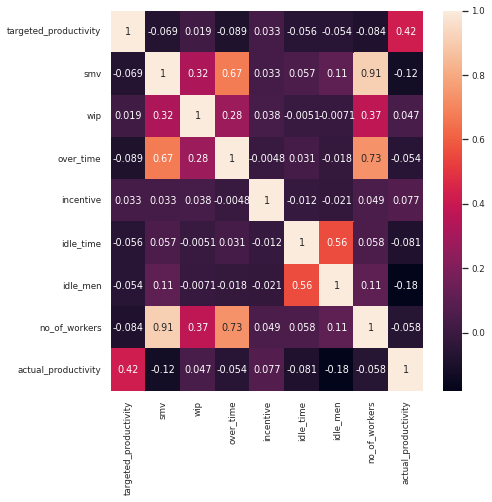

In [ ]:
df_corr=df[['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']].corr()
sns.set(style='white', font_scale=0.8, rc={'figure.figsize':(7,7)})
sns.heatmap(df_corr, annot=True)

Con este mapa de calor se puede observar que la correlación no existe. Sin embargo, se debe de considerar que existen dos departamentos encargados del acabado del producto: de costura y de finalización. Las proporciones de los datos que corresponden a cada departamento se muestran a continuación mediante un gráfico circular.

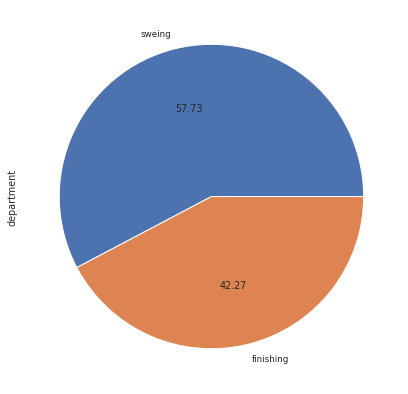

In [ ]:
df.department.value_counts().plot(kind='pie', autopct="%.2f")

Por esta razón, separar el conjunto de datos por estas dos variables es una acción necesaria.

In [ ]:
df_sweing=df[df.department=='sweing']
df_finishing=df[df.department=='finishing']

Ahora, realizando un mapa de calor para los datos correspondientes a cada variable se obtiene lo siguiente:

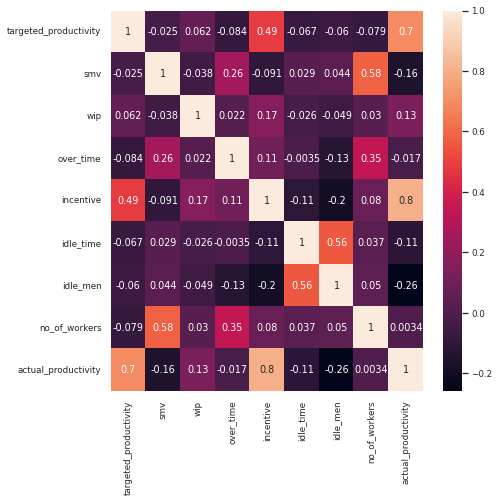

In [ ]:
# Departamento de costura
df_sweing_corr=df_sweing[['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']].corr()
sns.set(style='white', font_scale=0.8, rc={'figure.figsize':(7,7)})
sns.heatmap(df_sweing_corr, annot=True)

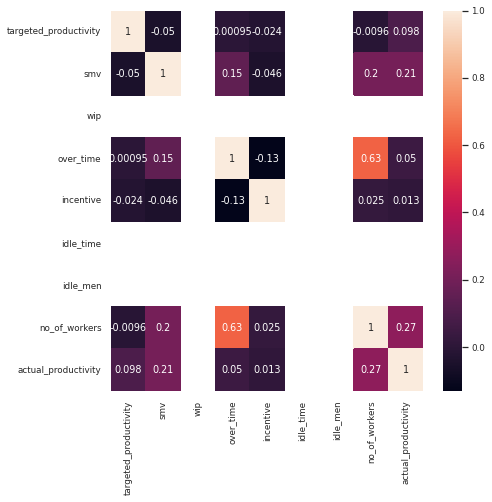

In [ ]:
# Departamento de acabado
df_finishing_corr=df_finishing[['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']].corr()
sns.set(style='white', font_scale=0.8, rc={'figure.figsize':(7,7)})
sns.heatmap(df_finishing_corr, annot=True)

Con esto se demuestra, parcialmente, que la hipótesis es correcta sólo para un departamento: el de costura. Sin embargo, en el mapa de calor se puede ver otro tipo de correlación para el mismo departamento. Se trata de las variables 'targeted_productivity' (relacionado con la importancia de realizar ciertas tareas) y la productividad. 

Text(0.5, 1.0, 'Targeted productivity vs Actual productivity')

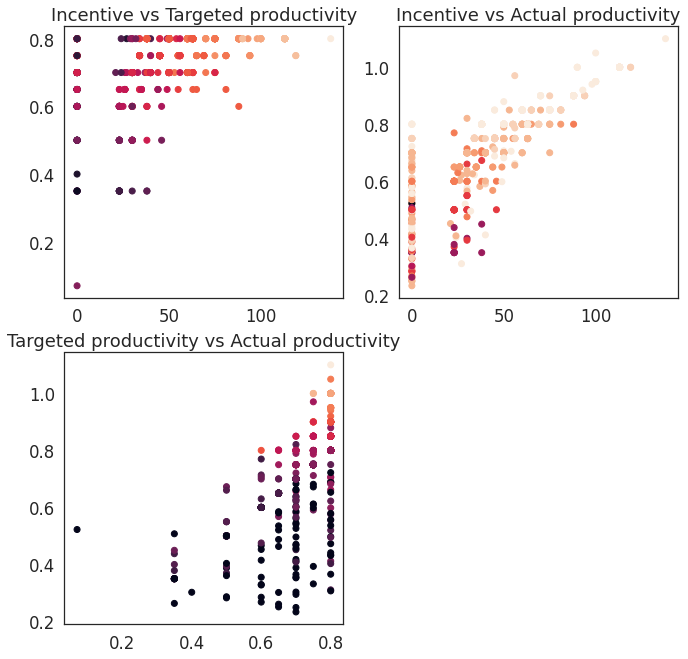

In [ ]:
sns.set(style='white', font_scale=1.5, rc={'figure.figsize':(11,11)})
plt.figure()
plt.subplot(2,2,1)
plt.scatter(df_sweing.incentive, df_sweing.targeted_productivity, c=df_sweing.actual_productivity)
plt.title('Incentive vs Targeted productivity')


plt.subplot(2,2,2)
plt.scatter(df_sweing.incentive, df_sweing.actual_productivity, c=df_sweing.targeted_productivity)
plt.title('Incentive vs Actual productivity')

plt.subplot(2,2,3)
plt.scatter(df_sweing.targeted_productivity, df_sweing.actual_productivity, c=df_sweing.incentive)
plt.title('Targeted productivity vs Actual productivity')

No obstante, la relación planteada desde la hipótesis es más evidente. Por esta razón, tales variables son consideradas para el proceso de clusterización. 

In [ ]:
X=df_sweing[['incentive', 'actual_productivity']]

El descenso del valor de la función objetivo se muestra en la siguiente Tabla. A su vez, se agrega una columna "p-%" la cuál muestra el descenso como un porcentaje. Aquí, el valor más alto representa el 100%.

In [ ]:
var = []
for i in range(1,10):
	kmeans=KMeans(n_clusters=i, init='k-means++', random_state=13)
	kmeans.fit(X)
	var.append(kmeans.inertia_)
pd.DataFrame({'Fobj':var, 'p-%':100*np.array(var)/var[0]}, index=np.arange(1,len(var)+1))

,Fobj,p-%
1,525501.089759,100.000000
2,215388.435290,40.987248
3,95512.703433,18.175548
4,44460.478922,8.460587
5,22703.388178,4.320331
6,13550.645212,2.578614
7,9072.848945,1.726514
8,5722.063628,1.088878
9,4466.531698,0.849957


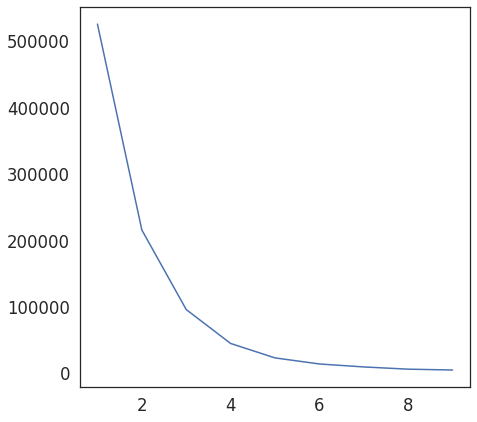

In [ ]:
sns.set(style='white', font_scale=1.5, rc={'figure.figsize':(7,7)})
plt.plot(range(1,len(var)+1), (var))

Ya sea considerando la Tabla o el método del codo, nos inclinamos por usar 3 clusters. 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Actual Productivity')

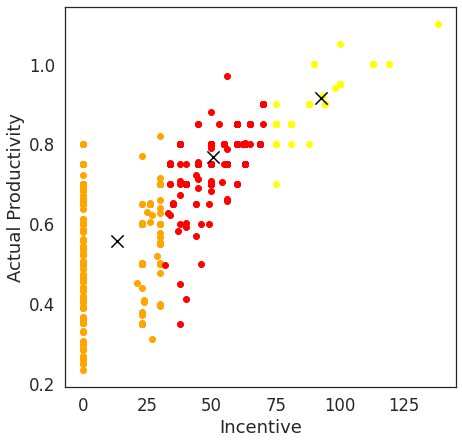

In [ ]:
kmeans=KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
clusters=kmeans.fit_predict(X)
df_sweing['label']=clusters

plt.scatter(df_sweing.incentive[df_sweing.label==0], df_sweing.actual_productivity[df_sweing.label==0], color='yellow')
plt.scatter(df_sweing.incentive[df_sweing.label==1], df_sweing.actual_productivity[df_sweing.label==1], color='orange')
plt.scatter(df_sweing.incentive[df_sweing.label==2], df_sweing.actual_productivity[df_sweing.label==2], color='red')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black', marker='x', s=150)
plt.xlabel('Incentive')
plt.ylabel('Actual Productivity')

# Postwork 4

- Evalúa si tu proyecto puede resolverse con un algoritmo de regresión. Si tu problema requiere que los datos vayan a ciertas categorías, puede que un algoritmo de regresión lineal no te sea tan útil. En cambio, si lo que necesitas es predecir cierta salida con base en múltiples entradas, o si necesitas predecir cierto dato con base en N datos anteriores, la regresión es tu herramienta.

- Ahora que sabes que tu problema puede resolverse con un algoritmo de regresión, primero construye un dataset de entrenamiento y uno de prueba, con tus funciones de MLUtilities. Puede que tengas que agregar funciones de MLUtilities nuevas, sobre todo si manejas series de tiempo. Utiliza los ejemplos y los retos para auxiliarte.

- Lleva tu bitácora de experimentos y prueba variar la cantidad de datos de entrenamiento y de prueba. También prueba cómo te funciona el utilizar una función lineal, polinomial de grado 2, grado 3 o grado 4. Puedes intentar con más grados si lo deseas, pero asegúrate de que mejore el desempeño antes de agregar grados.

- A veces, solamente un dato en una serie de tiempo no te da respuestas satisfactorias. Por ejemplo, calcular el clima de un día dados los climas anteriores puede darte un resultado aceptable, pero si combinas varias series de tiempo en un regresor lineal, ¡puede que tu desempeño mejore! no tengas miedo de combinar series de tiempo, siempre y cuando mantengas un orden.

En el Postwork 3 pudo verse que hay un par variables que tienen coeficientes de correlación de 0.7 y 0.8 al revisar su relación con el desempeño real del equipo de costura. Con estas variables, se realizará un modelo de regresión lineal múltiple que permita predecir el desempeño del equipo de costura. 

In [ ]:
# En este caso, se van a realizar un modelo de regresión lineal para buscar predecir
# la productividad del equipo de costura en términos de las variables que tienen
# una correlación alta con esa variable (esas matrices de correlación se
# encuentran en el postwork 3)
X = df_sweing[["incentive", "targeted_productivity"]]
y = df_sweing["actual_productivity"]

In [ ]:
# Se realiza la separación del dataset en conjunto de entrenamiento
# y conjunto de prueba
X_train, X_val, X_test, y_train, y_val, y_test = mlu.particionar(X, y, 0.7, 0, 0.3)

0.3


In [ ]:
# Se define y ajusta la regresión lineal
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Una vez entrenado el modelo de regresión, se evaluará.

In [ ]:
# Se evalúan las predicciones con el conjunto de entrenamiento
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(y_train,y_train_predict)
print("Entrenamiento: MSE = "+str(MSE))

# Se evalúan las predicciones con el conjunto de prueba
y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(y_test, y_test_predict))
print("Pruebas: MSE = "+str(MSE))

Entrenamiento: MSE = 0.005651965522756769
Pruebas: MSE = 0.005203998290547549


In [ ]:
# Se evalúan las predicciones con el conjunto de entrenamiento
R2 = r2_score(y_train,y_train_predict)
print("Entrenamiento: R2 = "+str(R2))

# Se evalúan las predicciones con el conjunto de prueba
R2 = r2_score(y_test, y_test_predict)
print("Pruebas: R2 = "+str(R2))

Entrenamiento: R2 = 0.7680800209847738
Pruebas: R2 = 0.7721707159033184


Para comenzar, puede verse que el MSE no es muy alto. Sin embargo, las variables que se buscan predecir se encuentran en el intervalo de 0 a 1, aproximadamente, por lo que ahí puede haber cierta ambigüedad sobre la relevancia de ese error. El orden de magnitud de los datos es de 0.1. En consecuencia, el error relativo es del orden del 0.5%. Parece que es un buen modelo.

Otra métrica es el coeficiente de determinación $R^2$, que en este caso parece estar en torno a 0.77. Esto sugiere que es un buen modelo. A su vez, también se puede calcular la raíz del coeficiente de determinación para estimar el coeficiente de correlación del modelo: es de 0.88. Esto significa que la correlación del nuevo modelo con el par de variables produce mejores reusltados que las variables individuales.

In [ ]:
# Se reajusta el tamaño de las gráficas
sns.set(style='white', font_scale=0.8, rc={'figure.figsize':(7,7)})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


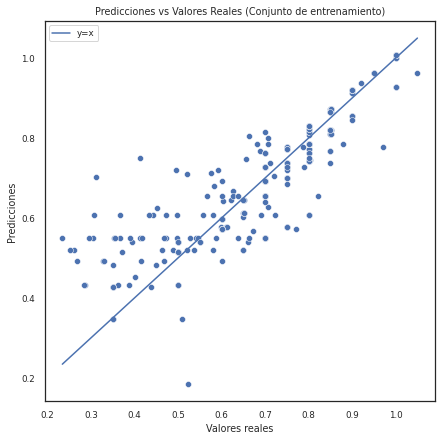

In [ ]:
# Se grafican las predicciones del conjunto de entrenamiento contra los
# valores reales para revisar si hay overfitting
sns.scatterplot(y_train, y_train_predict);
plt.plot(np.linspace(y_train.min(),y_train.max()),
         np.linspace(y_train.min(),y_train.max()), label="y=x")

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales (Conjunto de entrenamiento)")
plt.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


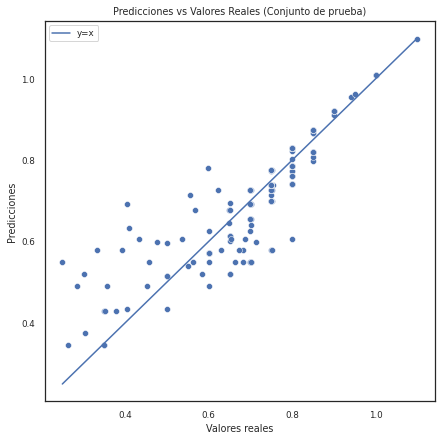

In [ ]:
# Se grafican las predicciones del conjunto de prueba contra los valores reales
sns.scatterplot(y_test, y_test_predict);
plt.plot(np.linspace(y_test.min(),y_test.max()),
         np.linspace(y_test.min(),y_test.max()), label="y=x")

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales (Conjunto de prueba)")
plt.legend()

plt.show()

# Postwork 5

- Evalúa si tu proyecto puede resolverse con un árbol de decisión o un random forest: Tu problema puede resolverse con un solo árbol de decisión si puedes pensar en varios if / else que podrían clasificar tu problema en una de las dos clases. Este es un clasificador muy sencillo, y puedes intentar con un solo árbol de decisión.
- Si tu problema pareciera ser más difícil de clasificar que esto, puedes probar con múltiples árboles de decisión en un random forest para ver si la clasificación mejora. Una buena clasificación es aquella que tiene más del 90% de precisión en el dataset de prueba. Una excelente clasificación es aquella que tiene más del 95% de precisión.
- Un problema de clasificación requiere forzosamente una bitácora de pruebas. Aunque muchos no la usan, te recomiendo encarecidamente que lleves una, porque es fácil que te frustres y repitas experimentos innecesariamente.
- Te recomiendo que empieces con pocos árboles en tu random forest, si llegas a necesitarlos. Y también te recomiendo que utilices valores impares para la cantidad de árboles. Puede ser un caso realmente extraño, pero ¿qué pasa si en una clasificación binaria, la mitad de árboles se va para positivo y la mitad para negativo? para evitar eso, siempre intenta con al menos N + 1 árboles, donde N es el número de clases.

In [ ]:
df_pw_5=df.drop(columns=['date', 'day', 'team'])
df_pw_5['quarter 1']=((df_pw_5['quarter']=='Quarter1')).astype('int')
df_pw_5['quarter 2']=((df_pw_5['quarter']=='Quarter2')).astype('int')
df_pw_5['quarter 3']=((df_pw_5['quarter']=='Quarter3')).astype('int')
df_pw_5['quarter 4']=((df_pw_5['quarter']=='Quarter4')).astype('int')
df_pw_5.head()

,quarter,department,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter 1,quarter 2,quarter 3,quarter 4
0,Quarter1,sweing,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,0,0,0
1,Quarter1,finishing,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,0,0,0
2,Quarter1,sweing,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0
3,Quarter1,sweing,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0
4,Quarter1,sweing,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,0,0,0


En primer lugar, se eliminan las variables 'date', 'day' y 'team', dado que estas variables no van con el proposito que se presigue. Ademas, se crean columnas desglosar las valores categoricos nominales de las variables 'quarter' y 'department. 

In [ ]:
df_pw_5['dep sweing']=((df_pw_5['department']=='sweing')).astype('int')
df_pw_5['dep finishing']=((df_pw_5['department']=='finishing')).astype('int')
df_pw_5.head()

,quarter,department,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter 1,quarter 2,quarter 3,quarter 4,dep sweing,dep finishing
0,Quarter1,sweing,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,0,0,0,1,0
1,Quarter1,finishing,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,0,0,0,0,1
2,Quarter1,sweing,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,1,0
3,Quarter1,sweing,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,1,0
4,Quarter1,sweing,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,0,0,0,1,0


In [ ]:
df_pw5=df_pw_5.drop(columns=['quarter', 'department'])
df_pw5.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter 1,quarter 2,quarter 3,quarter 4,dep sweing,dep finishing
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,0,0,0,1,0
1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,0,0,0,0,1
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,1,0
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,0,0,0,1,0
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,0,0,0,1,0


Ahora se discretiza la variable objetivo 'actual_producrivity' en 5 valores posibles. Asi, se crea la variable 'AP' que corresponde a 'actual_productivity' transformada en una variable categorica ordinal.

In [ ]:
AP=df_pw5.actual_productivity
AP=AP/AP.max()
AP*=5.49
AP=np.round(AP)
AP.unique()

array([5., 4., 3., 2., 1.])

In [ ]:
df_pw_5ch=df_pw5.drop(columns='actual_productivity')
df_pw_5ch['AP']=AP.astype('int')
df_pw_5ch.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter 1,quarter 2,quarter 3,quarter 4,dep sweing,dep finishing,AP
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,1,0,0,0,1,0,5
1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,1,0,0,0,0,1,4
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1,0,0,0,1,0,4
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,1,0,0,0,1,0,4
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,1,0,0,0,1,0,4


Las variables 'smv', 'wip', 'over_time', 'incetive', 'no_of_workers' poseen una gran cantidad de valores distintos. Por esta razon se transforman en variables categoricas ordinales de cinco valores posibles.

In [ ]:
df_pw_5ch.smv=np.ceil(5*df_pw5.smv/df_pw5.smv.max()).astype('int')

In [ ]:
df_pw_5ch.wip=np.ceil(5*df_pw5.wip/df_pw5.wip.max()).astype('int')

In [ ]:
df_pw_5ch.over_time=np.ceil(5*df_pw5.over_time/df_pw5.over_time.max()).astype('int')

In [ ]:
df_pw_5ch.incentive=np.ceil(5*df_pw5.incentive/df_pw5.incentive.max()).astype('int')

In [ ]:
df_pw_5ch.no_of_workers=np.ceil(5*df_pw5.no_of_workers/df_pw5.no_of_workers.max()).astype('int')

In [ ]:
df_pw_5ch.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter 1,quarter 2,quarter 3,quarter 4,dep sweing,dep finishing,AP
0,0.80,3,1,2,1,0.0,0,0,4,1,0,0,0,1,0,5
1,0.75,1,0,1,0,0.0,0,0,1,1,0,0,0,0,1,4
2,0.80,2,1,1,1,0.0,0,0,2,1,0,0,0,1,0,4
3,0.80,2,1,1,1,0.0,0,0,2,1,0,0,0,1,0,4
4,0.80,3,1,1,1,0.0,0,0,4,1,0,0,0,1,0,4


En este punto, ya es posible aplicar el algoritmo RandomForestClassifier sin problemas.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(df_pw_5ch.drop(columns='AP'), df_pw_5ch.AP,
                                                random_state=0)
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           1       0.12      0.12      0.12         8
           2       0.41      0.40      0.41        30
           3       0.64      0.57      0.61        80
           4       0.75      0.75      0.75       159
           5       0.30      0.39      0.34        23

    accuracy                           0.63       300
   macro avg       0.44      0.45      0.45       300
weighted avg       0.63      0.63      0.63       300



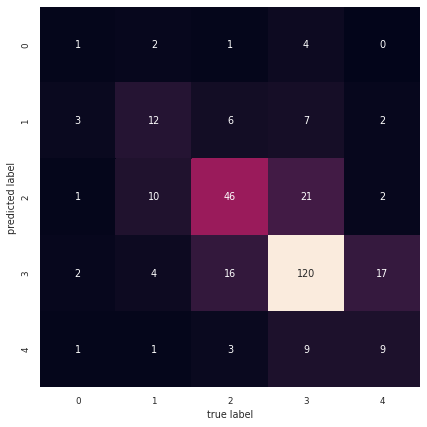

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Se puede notar que sin omitir ninguna de las variables contempladas el algoritmo tiene un desempeño bastante promedio. 

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_pw_5ch.drop(columns=['AP', 'quarter 1', 'quarter 2', 'quarter 3', 'quarter 4']), 
                                                df_pw_5ch.AP)
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           1       0.20      0.33      0.25         3
           2       0.29      0.43      0.35        21
           3       0.44      0.74      0.55        46
           4       0.92      0.62      0.74       220
           5       0.13      0.50      0.20        10

    accuracy                           0.62       300
   macro avg       0.40      0.52      0.42       300
weighted avg       0.77      0.62      0.66       300



Al eliminar la variable 'quarter' no se puede afirmar que el algoritmo mejoro o empeoro.

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_pw_5ch[['targeted_productivity', 'incentive', 'dep sweing']], 
                                                df_pw_5ch.AP)
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.30      0.67      0.41        12
           3       0.56      0.72      0.63        53
           4       0.94      0.63      0.75       231
           5       0.05      0.50      0.09         4

    accuracy                           0.64       300
   macro avg       0.37      0.50      0.38       300
weighted avg       0.84      0.64      0.71       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Considerando unicamente las variables 'targeted_productivity' y 'incentive' tampoco se puede observar mejora alguna.

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_pw_5ch[df_pw_5ch['dep sweing']==1][['targeted_productivity', 'incentive']], 
                                                df_pw_5ch[df_pw_5ch['dep sweing']==1]['AP'], random_state=1)
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           2       0.67      0.91      0.77        11
           3       0.83      0.77      0.80        52
           4       0.91      0.79      0.84       110
           5       0.00      0.00      0.00         0

    accuracy                           0.79       173
   macro avg       0.60      0.62      0.60       173
weighted avg       0.87      0.79      0.83       173



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ahora, considerando unicamente los datos que ofrece el valor 'sweing' con las variables 'targeted_productivity' y 'incentive', la mejora es significativa.

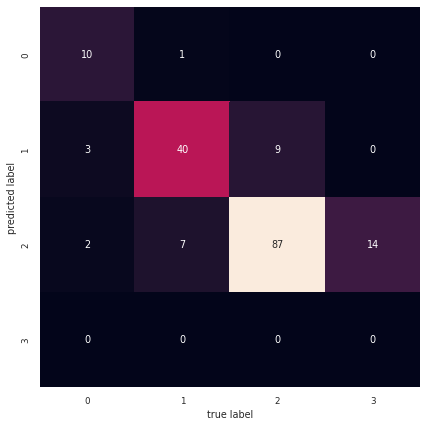

In [ ]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_pw_5ch[df_pw_5ch['dep sweing']==0][['targeted_productivity', 'incentive']], 
                                                df_pw_5ch[df_pw_5ch['dep sweing']==0]['AP'], random_state=1)
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.16      0.19      0.17        21
           4       0.76      0.44      0.55       101
           5       0.00      0.00      0.00         4

    accuracy                           0.38       127
   macro avg       0.18      0.13      0.15       127
weighted avg       0.63      0.38      0.47       127



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Sin embargo, cuando se considera el valor 'finishing' el desempeño empeora significativamente. Esto nos dice que los datos ofrecidos por la variable 'finishing' puden estar perjudicando el desempeño del algoritmo. Esto encuentra sentido en el hecho que el departamento 'finishing' depende del departamento 'sweing'. Por lo que, a partir de aquí, se consideran unicamente los datos que corresponden al valor 'sweing'.

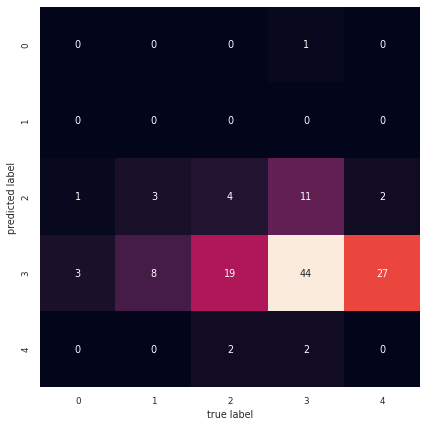

In [ ]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df_pw_5ch[df_pw_5ch['dep sweing']==1].drop(columns='AP'), 
                                                df_pw_5ch[df_pw_5ch['dep sweing']==1]['AP'], random_state=1)
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.60      0.82      0.69        11
           3       0.65      0.78      0.70        40
           4       0.97      0.78      0.87       119
           5       0.07      1.00      0.13         1

    accuracy                           0.77       173
   macro avg       0.46      0.67      0.48       173
weighted avg       0.85      0.77      0.80       173



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


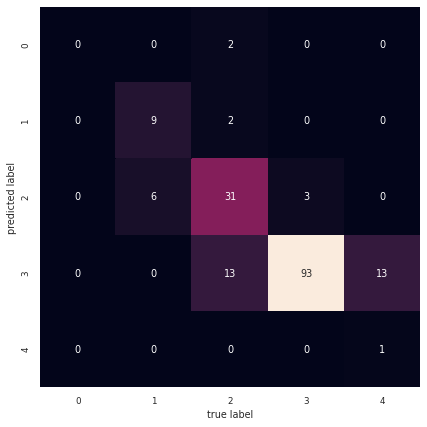

In [ ]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Ahora, el dataframe etiquetado como 'new_data' representa los datos obtenidos del departamento 'sweing'. Entonces, se hacen la discretizacion tomando en cuenta este dataframe.

In [ ]:
new_data=df_sweing.drop(columns=['date', 'department', 'day', 'team'])
new_data['quarter 1']=((new_data['quarter']=='Quarter1')).astype('int')
new_data['quarter 2']=((new_data['quarter']=='Quarter2')).astype('int')
new_data['quarter 3']=((new_data['quarter']=='Quarter3')).astype('int')
new_data['quarter 4']=((new_data['quarter']=='Quarter4')).astype('int')

AP=df_sweing.actual_productivity
AP=AP/AP.max()
AP*=5.49
AP=np.round(AP)
new_data['AP']=AP.astype('int')
new_data=new_data.drop(columns=['quarter', 'actual_productivity'])
new_data.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,label,quarter 1,quarter 2,quarter 3,quarter 4,AP
0,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,0,1,0,0,0,5
2,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,2,1,0,0,0,4
3,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,2,1,0,0,0,4
4,0.8,25.90,1170.0,1920,50,0.0,0,0,56.0,2,1,0,0,0,4
5,0.8,25.90,984.0,6720,38,0.0,0,0,56.0,2,1,0,0,0,4


In [ ]:
for i in ['smv', 'wip', 'over_time', 'incentive', 'no_of_workers']:
  new_data[i]=np.ceil(5*new_data[i]/new_data[i].max()).astype('int')
new_data.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,label,quarter 1,quarter 2,quarter 3,quarter 4,AP
0,0.8,3,1,2,4,0.0,0,0,4,0,1,0,0,0,5
2,0.8,2,1,1,2,0.0,0,0,2,2,1,0,0,0,4
3,0.8,2,1,1,2,0.0,0,0,2,2,1,0,0,0,4
4,0.8,3,1,1,2,0.0,0,0,4,2,1,0,0,0,4
5,0.8,3,1,2,2,0.0,0,0,4,2,1,0,0,0,4


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(new_data.drop(columns='AP'), 
                                                new_data.AP, random_state=2)
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.53      0.91      0.67        11
           3       0.83      0.80      0.81        54
           4       0.95      0.88      0.92        93
           5       0.80      0.92      0.86        13

    accuracy                           0.85       173
   macro avg       0.62      0.70      0.65       173
weighted avg       0.86      0.85      0.85       173



Ahora se cuenta con una precision de 0.85. 

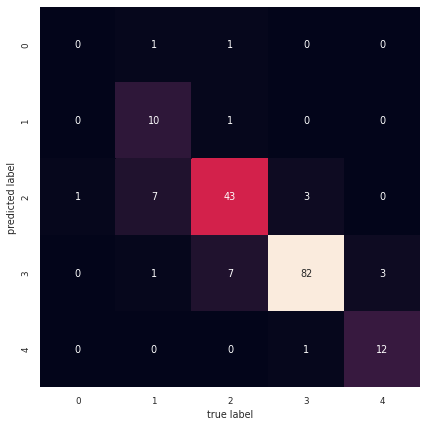

In [ ]:
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(new_data[['targeted_productivity', 'incentive']], 
                                                new_data.AP, random_state=2)
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.58      0.92      0.71        12
           3       0.87      0.79      0.83        57
           4       0.95      0.88      0.92        93
           5       0.73      1.00      0.85        11

    accuracy                           0.86       173
   macro avg       0.63      0.72      0.66       173
weighted avg       0.88      0.86      0.87       173



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


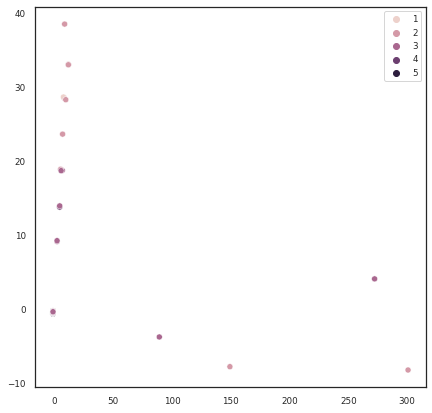

In [ ]:
from sklearn.decomposition import PCA
model = PCA(n_components=2) 
model.fit(new_data.drop(columns='AP'))
                                                
X_2D = model.transform(new_data.drop(columns='AP')) 
y=np.array(new_data.AP)
sns.scatterplot(X_2D[:,0], X_2D[:,1], hue=y)

# Postwork 6

- Evalúa si tu proyecto puede resolverse con un algoritmo de redes neuronales artificiales. Las redes neuronales artificiales son excelentes clasificadores y puede que si ya tenías un problema a resolver con árboles de decisión, puedas aplicarlo también con redes neuronales.
- Es crucial que en este paso registres los experimentos que hagas en una bitácora: a manera de consejo profesional, es muy fácil perderse entre topologías diferentes, cantidad de neuronas en cada capa, cantidad de capas, tasas de aprendizaje diferentes, y datos diferentes. Te recomiendo hacer una tabla en donde en un eje coloques las configuraciones y en otro eje coloques las tasas de aprendizaje.
- Como las redes neuronales pueden sobreentrenarse o subentrenarse, es importante que experimentes con porcentajes diferentes de datasets y veas si mejoran o empeoran su desempeño. Utiliza K-fold si quieres resultados más confiables, y recuerda que, con cada valor de K, tienes que realizar K entrenamientos.
- A menos de que tengas una gran computadora o mucho tiempo libre, evita utilizar LOOCV.

Como la productividad real del equipo de acabado no puede estimarse a partir de un modelo lineal y, de hecho, aparenta no tener mucha correlación entre esta variable y el resto de los parámetros medidos, se optará por estudiar este grupo con una red neuronal.

In [ ]:
# Se define el dataframe con las variables no-nulas para el equipo de acabado
df_classifier = df_finishing[["targeted_productivity", "smv", "over_time",
                              "incentive", "no_of_workers", "actual_productivity"]]

# Se usa la versión discretizada de la actual productivity
AP_classifier = df_classifier["actual_productivity"]
AP_classifier = AP_classifier/AP_classifier.max()
AP_classifier*=5.49
AP_classifier=np.round(AP_classifier)
df_classifier["actual_productivity"] = AP_classifier.astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# Se escala el dataset
escalador = StandardScaler()
escala = escalador.fit(df_classifier.drop(columns="actual_productivity"))

df_scaled = escala.transform(df_classifier.drop(columns="actual_productivity"))

In [ ]:
# Vamos a definir el modelo de Keras
red_neuronal = Sequential()
red_neuronal.add(Dense(units=3, input_dim=5, activation="sigmoid"))
red_neuronal.add(Dense(units=6, activation="sigmoid"))
red_neuronal.add(Dense(units=6, activation="sigmoid"))

red_neuronal.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["Recall"])

In [ ]:
# Se utiliza una KFold para hacer una validación cruzada de
# la red neuronal
kfold = KFold(n_splits=5, random_state=20, shuffle=True)

# Se definen las variables independientes y la variable dependiente
X = df_scaled[:, :5]
y = np.array(df_classifier["actual_productivity"])

ciclo = 1
for indices_train, indices_test in kfold.split(X):
  print(f"Validación {ciclo}:\n")
  # Se separan los datos de entrenamiento y de prueba
  X_train, X_test = X[indices_train], X[indices_test]
  y_train, y_test = y[indices_train], y[indices_test]

  # Our vectorized labels
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  # Se entrena la red neuronal
  # verbose=0 es para que no se impriman las epochs
  red_neuronal.fit(X_train, y_train, epochs=150, verbose=0)

  # Se evalúa la red
  score = red_neuronal.evaluate(X_test, y_test, verbose=0)
  print(f'Sensibilidad en el conjunto de prueba: {score[1]}\n\n---------------')  

  ciclo+=1

Validación 1:

Sensibilidad en el conjunto de prueba: 0.9313725233078003

---------------
Validación 2:

Sensibilidad en el conjunto de prueba: 0.9306930899620056

---------------
Validación 3:

Sensibilidad en el conjunto de prueba: 0.8811880946159363

---------------
Validación 4:

Sensibilidad en el conjunto de prueba: 0.9207921028137207

---------------
Validación 5:

Sensibilidad en el conjunto de prueba: 0.8514851331710815

---------------


In [ ]:
from sklearn import metrics

y_pred = red_neuronal.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
print(metrics.classification_report(y_pred, np.argmax(y_test, axis=1)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.14      0.14      0.14         7
           3       0.26      0.60      0.37        15
           4       0.82      0.37      0.51        76
           5       0.11      0.67      0.18         3

    accuracy                           0.40       101
   macro avg       0.27      0.36      0.24       101
weighted avg       0.67      0.40      0.45       101



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Aunque el desempeño de la red neuronal no es mucho mejor al del Random Forest, sí permite visualizar que el departamento de acabados tiene dificultades logísticas. Esto es porque no es posible predecir satisfactoriamente la productividad, eso implica muchas variaciones en los procesos.

Una de las posibles fallas logísticas es el flujo entre el departamento de costura y el de acabados. Eso se ve en el siguiente Scatterplot entre el WIP (work in progress) contra la variable binaria de si se trata del departamento de acabados o no (1=Sí, 0=No). _Work in progress_ se refiere al número de productos sin terminar.

Como puede verse en la gráfica, el departamento de acabados no tiene WIPs. Eso indica que el flujo entre departamentos no es suficientemente bueno (porque sucede que la productividad sí es buena en el departamento de costura pero no en el de acabados, a pesar de que en el primero sí hay WIPs y en el segundo no).

Text(0, 0.5, 'Finishing Department (1=Yes, 0=No)')

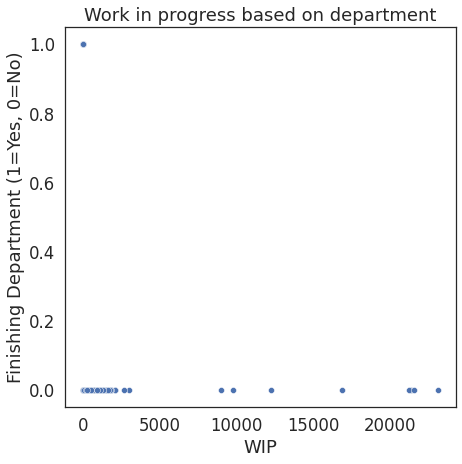

In [ ]:
sns.set(style='white', font_scale=1.5, rc={'figure.figsize':(7,7)})
sns.scatterplot(x="wip", y="dep finishing", data=df_pw5)
plt.title("Work in progress based on department")
plt.xlabel("WIP")
plt.ylabel("Finishing Department (1=Yes, 0=No)")

# Postwork 7
- Evalúa si tu proyecto es de clasificación o de predicción. Si es de predicción te sugiero que, después de leer toda esta sección, te bases en la siguiente sección. Si tu proyecto es de clasificación, lo más probable es que hayas hecho previamente un proyecto con árboles de decisión y/o redes neuronales artificiales para clasificación.

- Casarte con un único método de clasificación es algo que ningún Data Scientist debería hacer: Es importante experimentar con varios algoritmos de clasificación y ver cuál te arroja mejores resultados. A veces es importante que pensemos por qué cierto algoritmo funcionó mejor que otro. Por ejemplo: ¿será que tus datos pueden agruparse con campanas de Gauss y Naïve Bayes funciona muy bien?

La parte de nuestro proyecto que puede entenderse como clasficación es separar entre varias categorías. Al ser modelos que dependen de muchas variables, podría ser acertado localizar explorar ese dataframe también con el área de la agrupación. Esto es porque la parte de clasificadores es poco prometedora para estudiar al departamento de acabados.

Al tratarse de la clusterización, para comparar con un tercer algoritmo paralelo al random forest y a la red neuronal, se realizó un algoritmo de k-means con 5 entroides. Sin embargo, como podrá verse a continuación, es un algoritmo que agrupa pero no en las 5 categorías que se definen con la productividad real.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Productividad real')

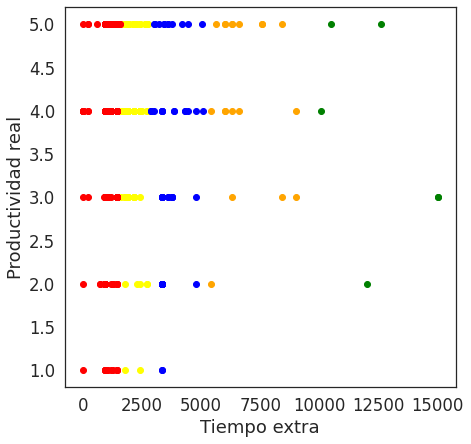

In [ ]:
kmeans=KMeans(n_clusters=5, init='k-means++')

X = df_classifier.drop(columns="actual_productivity")

kmeans.fit(X)
clusters = kmeans.fit_predict(X)

df_classifier["Label"] = clusters

plt.scatter(df_classifier.over_time[df_classifier.Label==0], df_classifier.actual_productivity[df_classifier.Label==0], color='yellow')
plt.scatter(df_classifier.over_time[df_classifier.Label==1], df_classifier.actual_productivity[df_classifier.Label==1], color='orange')
plt.scatter(df_classifier.over_time[df_classifier.Label==2], df_classifier.actual_productivity[df_classifier.Label==2], color='red')
plt.scatter(df_classifier.over_time[df_classifier.Label==3], df_classifier.actual_productivity[df_classifier.Label==3], color='green')
plt.scatter(df_classifier.over_time[df_classifier.Label==4], df_classifier.actual_productivity[df_classifier.Label==4], color='blue')

plt.xlabel("Tiempo extra")
plt.ylabel("Productividad real")

En la gráfica anterior se muestra que los grupos generados con k-means  son "perpendiculares" a la productividad real. Por esto, parece que tiene más sentido explorar el departamento de acabados en términos de, por ejemplo, el tiempo extra que dedica el personal.